In [281]:
import matplotlib.pyplot as plt
import pandas as pd

In [282]:
jb = pd.read_csv(r"C:\Tweeter project\Election dataset\jb_1_en_sent3.csv")

In [283]:
jb.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'collected_at', 'emojis',
       'cleaned_tweet', 'language', 'sentiment_vader', 'sentiment_TextBlob',
       'sentiment_Transformers'],
      dtype='object')

- ### Next dropp not necessaries columns and nan values

In [59]:
drop_column = ['tweet_id','user_id','user_name' ,'continent','state_code','user_description', 'source']

jb = jb.drop(columns=drop_column)

In [278]:
jb.shape

(181136, 20)

In [279]:
total_nan = jb.isna().sum().sum()
print(f"Total number of NaN values: {total_nan}")

Total number of NaN values: 336175


In [286]:
nan_per_column = jb.isna().sum()
print(nan_per_column)

created_at                     0
tweet                          0
likes                          0
retweet_count                  0
user_screen_name               0
user_join_date                 0
user_followers_count           0
user_location                  0
lat                            0
long                           0
city                           0
country                        0
state                          0
collected_at                   0
emojis                    298357
cleaned_tweet                  0
language                       2
sentiment_vader                0
sentiment_TextBlob             0
sentiment_Transformers    353282
dtype: int64


In [76]:
# List of columns to check for NaN values
columns_to_check = ['lat',
       'long', 'city', 'country', 'state',]

# Drop rows where all values in the listed columns are NaN
jb = jb.dropna(subset=columns_to_check, how='all')

In [74]:
jb = jb.dropna(subset=['tweet', 'likes', 'retweet_count', 'user_screen_name', 'user_join_date', 'user_followers_count', 'collected_at'])


In [78]:
jb[['city', 'country', 'state']] = jb[['city', 'country', 'state']].fillna('Unknown')


In [284]:
jb.loc[jb["country"] == "United States", "country"] = "United States of America"

In [285]:
jb.shape

(355282, 20)

In [287]:
jb_usa = jb[jb['country']=="United States of America"]

=============================================================================
- ### Next cleaning Date format and non numeric Vaues

In [288]:
jb_usa.dtypes

created_at                 object
tweet                      object
likes                     float64
retweet_count             float64
user_screen_name           object
user_join_date             object
user_followers_count      float64
user_location              object
lat                       float64
long                      float64
city                       object
country                    object
state                      object
collected_at               object
emojis                     object
cleaned_tweet              object
language                   object
sentiment_vader           float64
sentiment_TextBlob        float64
sentiment_Transformers    float64
dtype: object

In [289]:
jb_usa['collected_at'] = jb_usa['collected_at'].str[:10]

C:\Users\louay\AppData\Local\Temp\ipykernel_13712\695764171.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa['collected_at'] = jb_usa['collected_at'].str[:10]


In [290]:
jb_usa['collected_at'].value_counts()

collected_at
2020-10-27    41727
2020-10-21    28374
2020-11-08    22492
2020-11-05    13241
2020-11-09    12766
2020-11-01     9663
2020-11-07     9102
2020-11-04     8779
2020-11-06     7377
2020-11-03     7332
2020-10-29     5535
2020-11-02     5433
2020-10-28     4734
2020-10-30     4581
Name: count, dtype: int64

In [291]:
unique_collection_days = jb_usa['collected_at'].unique()
print(unique_collection_days)

['2020-10-21' '2020-10-27' '2020-10-28' '2020-10-29' '2020-10-30'
 '2020-11-01' '2020-11-02' '2020-11-03' '2020-11-04' '2020-11-05'
 '2020-11-06' '2020-11-07' '2020-11-08' '2020-11-09']


In [292]:
jb_usa['collected_at'] = pd.to_datetime(jb_usa['collected_at'],errors='coerce')

C:\Users\louay\AppData\Local\Temp\ipykernel_13712\3473400310.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa['collected_at'] = pd.to_datetime(jb_usa['collected_at'],errors='coerce')


In [293]:
jb_usa['created_at'] = jb_usa['created_at'].str[:10]

C:\Users\louay\AppData\Local\Temp\ipykernel_13712\2808858062.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa['created_at'] = jb_usa['created_at'].str[:10]


In [294]:
jb_usa['created_at'].value_counts()

created_at
2020-11-07    22492
2020-10-23    16511
2020-11-04    13232
2020-11-08    12766
2020-11-06     9102
2020-11-03     8779
2020-11-05     7386
2020-11-02     7332
2020-10-16     7078
2020-10-22     5864
2020-10-28     5535
2020-11-01     5433
2020-10-15     5277
2020-10-25     5265
2020-10-21     4955
2020-10-31     4945
2020-10-27     4734
2020-10-30     4718
2020-10-24     4605
2020-10-29     4581
2020-10-26     4527
2020-10-20     4294
2020-10-17     4108
2020-10-19     3858
2020-10-18     3759
Name: count, dtype: int64

In [295]:
jb_usa['created_at'] = pd.to_datetime(jb['created_at'],errors='coerce')

C:\Users\louay\AppData\Local\Temp\ipykernel_13712\296182764.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa['created_at'] = pd.to_datetime(jb['created_at'],errors='coerce')


In [296]:
jb_usa['user_join_date'] = jb_usa['user_join_date'].str[:10]

C:\Users\louay\AppData\Local\Temp\ipykernel_13712\2358397498.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa['user_join_date'] = jb_usa['user_join_date'].str[:10]


In [297]:
jb_usa['user_join_date'].value_counts()

user_join_date
2020-03-31    1313
2009-03-12    1148
2012-10-11    1128
2013-02-28     469
2009-03-28     422
              ... 
2012-12-23       1
2007-07-03       1
2008-01-05       1
2007-12-04       1
2007-12-26       1
Name: count, Length: 4922, dtype: int64

In [298]:
jb_usa['user_join_date'] = pd.to_datetime(jb_usa['user_join_date'],errors='coerce')

C:\Users\louay\AppData\Local\Temp\ipykernel_13712\1589301519.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa['user_join_date'] = pd.to_datetime(jb_usa['user_join_date'],errors='coerce')


In [299]:

# Count tweets per collection time
jb_usa['collected_at'].nunique()

14

In [300]:
jb_usa.dtypes

created_at                datetime64[ns]
tweet                             object
likes                            float64
retweet_count                    float64
user_screen_name                  object
user_join_date            datetime64[ns]
user_followers_count             float64
user_location                     object
lat                              float64
long                             float64
city                              object
country                           object
state                             object
collected_at              datetime64[ns]
emojis                            object
cleaned_tweet                     object
language                          object
sentiment_vader                  float64
sentiment_TextBlob               float64
sentiment_Transformers           float64
dtype: object

=============================================================================

- Next convert likes,user_followers_count , Lat, long to numercal values 

In [301]:
jb_usa['lat'].sample(10)

316449    29.758938
137662    40.441694
91650     39.783730
125778    43.621195
109924    39.783730
256639    29.949932
47311     38.894992
56959     40.075738
220032    30.271129
152744    43.979280
Name: lat, dtype: float64

In [302]:
jb_usa["user_followers_count"] =pd.to_numeric(jb["user_followers_count"],errors='coerce')
jb_usa['likes'] = pd.to_numeric(jb['likes'], errors='coerce')
jb_usa['lat'] = pd.to_numeric(jb['lat'], errors='coerce')
jb_usa['long'] = pd.to_numeric(jb['long'], errors='coerce')


C:\Users\louay\AppData\Local\Temp\ipykernel_13712\1630589889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa["user_followers_count"] =pd.to_numeric(jb["user_followers_count"],errors='coerce')
C:\Users\louay\AppData\Local\Temp\ipykernel_13712\1630589889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa['likes'] = pd.to_numeric(jb['likes'], errors='coerce')
C:\Users\louay\AppData\Local\Temp\ipykernel_13712\1630589889.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

In [303]:
jb_usa.dtypes

created_at                datetime64[ns]
tweet                             object
likes                            float64
retweet_count                    float64
user_screen_name                  object
user_join_date            datetime64[ns]
user_followers_count             float64
user_location                     object
lat                              float64
long                             float64
city                              object
country                           object
state                             object
collected_at              datetime64[ns]
emojis                            object
cleaned_tweet                     object
language                          object
sentiment_vader                  float64
sentiment_TextBlob               float64
sentiment_Transformers           float64
dtype: object

In [304]:
jb_usa['user_followers_count']

0         1860.0
1         1536.0
2          390.0
3         1397.0
4          266.0
           ...  
355265    1092.0
355266       9.0
355269     436.0
355273     311.0
355275     674.0
Name: user_followers_count, Length: 181136, dtype: float64

In [305]:
top_10_followers = jb_usa['user_followers_count'].nlargest(10)
print(top_10_followers)

89347     5750841.0
303207    5747840.0
337822    5477365.0
167863    5476752.0
273864    5258686.0
282137    5258685.0
296265    5258678.0
325688    3264793.0
252239    3264528.0
250744    3264527.0
Name: user_followers_count, dtype: float64


==========================================================================================


- ###  Next Cleaning text and detected anguages

In [208]:
import re

# Regular expression to match emojis and visual symbols
emoji_pattern = re.compile(
    "["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map symbols
    u"\U0001F700-\U0001F77F"  # alchemical symbols
    u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    u"\U0001FA00-\U0001FA6F"  # Chess Symbols
    u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    u"\U00002700-\U000027BF"  # Dingbats
    u"\U0001F1E0-\U0001F1FF"  # Flags (iOS)
    "]+", flags=re.UNICODE)

# Function to extract emojis
def extract_emojis(text):
    return " ".join(emoji_pattern.findall(text))

# Function to remove emojis
def remove_emojis(text):
    return emoji_pattern.sub(r'', text)

# Create new column with extracted emojis
jb['emojis'] = jb['tweet'].apply(lambda x: extract_emojis(str(x)))

# Remove emojis from 'cleaned_tweet' column
jb['cleaned_tweet'] = jb['tweet'].apply(lambda x: remove_emojis(str(x)))

# Display the updated DataFrame
print(jb[['cleaned_tweet', 'emojis']])

                                             cleaned_tweet emojis
0        #Elecciones2020 | En #Florida: #JoeBiden dice ...      🌐
2        @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...       
4        #censorship #HunterBiden #Biden #BidenEmails #...       
6        In 2020, #NYPost is being #censorship #CENSORE...       
11       FBI Allegedly Obtained Hunter Biden Computer, ...       
...                                                    ...    ...
1059898  @elnuevoherald @ngameztorres LOS MEDIOS A LA F...       
1059899  Mr. #Biden, tear down that wall (with #Mexico)...       
1059902  @elnuevoherald LOS MEDIOS A LA FUERZA QUIEREN ...       
1059904  Stop laying @CNN !\n#Paris and #London dont gi...      😂
1059906  L'OTAN va sortir de sa léthargie et redevenir ...       

[355282 rows x 2 columns]


In [209]:
# Remove URLs \
# Remove mentions (@username) \
# Remove hashtags but keep the words \
# Replace HTML entities like &amp; \
# Remove newlines and tabs \
# Remove punctuation \
# Convert to lowercase \
# Normalize contractions \
# Remove extra whitespace \
# Strip leading/trailing whitespace

jb['cleaned_tweet'] = jb['cleaned_tweet'].fillna('') \
    .replace(r'http\S+|www\S+|https\S+', '', regex=True) \
    .replace(r'@\w+', '', regex=True) \
    .replace(r'#(\w+)', r'\1', regex=True) \
    .replace('&amp;', 'and', regex=False) \
    .replace(r'[\n\t]+', ' ', regex=True) \
    .replace(r'[^\w\s]', '', regex=True) \
    .str.lower() \
    .replace(r"\bim\b", "i am", regex=True) \
    .replace(r"\bi'm\b", "i am", regex=True) \
    .replace(r'\s+', ' ', regex=True) \
    .str.strip()



In [ ]:
# Remove non-alphabetic characters (keeping spaces)
jb['cleaned_tweet'] = jb['cleaned_tweet'].str.replace(r'[^a-zA-Z\s]', '', regex=True)

# Check again to confirm non-alphabetic characters are removed
non_alpha_count = jb['cleaned_tweet'].str.contains(r'[^a-zA-Z\s]').sum()
print(non_alpha_count) 

In [215]:
# Find tweets with non-alphabetic characters (except spaces)
jb['cleaned_tweet'].str.contains(r'[^a-zA-Z\s]').sum()


0

In [306]:
jb_usa.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'collected_at', 'emojis',
       'cleaned_tweet', 'language', 'sentiment_vader', 'sentiment_TextBlob',
       'sentiment_Transformers'],
      dtype='object')

In [307]:
jb_usa["country"].unique()

array(['United States of America'], dtype=object)

In [309]:
jb_usa["country"].value_counts()

country
United States of America    181136
Name: count, dtype: int64

In [227]:
from langdetect import detect

# Function to detect language
def detect_language(text):
    try:
        return detect(text)
    except:
        return None  # Return None if detection fails

# Detect the language of each tweet and store it in a new column
jb['language'] = jb['cleaned_tweet'].apply(detect_language)

In [310]:
jb_usa['language'].value_counts()

language
en    144339
nl     12026
es      6351
da      3523
af      2517
tr      2005
no      1875
id      1360
fi      1318
fr      1178
ca      1126
pt       731
de       482
it       471
sv       461
ro       328
et       254
so       222
sl       180
tl        92
cy        82
pl        70
hr        33
lv        26
lt        21
sk        18
vi        14
sq        13
sw         9
hu         6
cs         5
Name: count, dtype: int64

In [311]:
jb_usa[jb_usa["language"] == "en"].shape[0]


144339

In [312]:
jb_usa[jb_usa["language"] != "en"].shape[0]

36797

In [315]:
jb_usa['emojis'].fillna('', inplace=True)

C:\Users\louay\AppData\Local\Temp\ipykernel_13712\4022825323.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa['emojis'].fillna('', inplace=True)


In [316]:
jb_usa['language'].fillna('', inplace=True)

C:\Users\louay\AppData\Local\Temp\ipykernel_13712\4124701277.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa['language'].fillna('', inplace=True)


=========================================================================================


- ### Next working on extracting sentiment 

In [317]:
jb_usa['language'].nunique()

31

In [ ]:
pip install vaderSentiment==3.3.2

In [261]:
# vader more efficent for Eng languaes 
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

analyzer = SentimentIntensityAnalyzer()

def get_sentiment(text):
    scores = analyzer.polarity_scores(text)
    return scores['compound']

jb['sentiment_vader'] = jb['cleaned_tweet'].apply(get_sentiment)

In [318]:
jb_usa['sentiment_vader'].value_counts()

sentiment_vader
 0.0000    60902
 0.3612     2800
 0.5719     2719
 0.4404     2585
 0.5859     2244
           ...  
-0.1893        1
 0.8303        1
-0.4230        1
 0.2692        1
 0.5923        1
Name: count, Length: 9521, dtype: int64

- ### Using Multilingual Sentiment Analysis Tools

In [263]:
from textblob import TextBlob

def get_sentiment_textblob(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity  # returns a value between -1 and 1

# Apply TextBlob for sentiment analysis
jb['sentiment_TextBlob'] = jb['cleaned_tweet'].apply(get_sentiment_textblob)

In [ ]:
pip install transformers==4.31.0

In [ ]:
from transformers import pipeline

# Load a sentiment analysis model that supports multiple languages
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

def get_sentiment_transformers(text):
    result = sentiment_pipeline(text)
    return result[0]['score']  # Depending on the model, you may need to adapt this

# Apply the transformers model
jb.loc[:999, 'sentiment_Transformers'] = jb.loc[:999, 'cleaned_tweet'].apply(get_sentiment_transformers)

In [466]:
jb.loc[1000:1999, 'sentiment_Transformers'] = jb.loc[1000:1999, 'cleaned_tweet'].apply(get_sentiment_transformers)


In [319]:
jb_usa['sentiment_Transformers'].count()

1552

In [320]:
jb_usa[['sentiment_TextBlob', 'sentiment_vader','sentiment_Transformers']]

,sentiment_TextBlob,sentiment_vader,sentiment_Transformers
0,0.000000,0.4588,0.445299
1,0.000000,0.0000,0.551448
2,0.000000,0.0000,0.854767
3,-0.148810,-0.4019,0.594027
4,-0.100000,0.0000,0.671054
...,...,...,...
355265,0.000000,0.0000,NaN
355266,0.100000,0.0000,NaN
355269,0.375000,0.3400,NaN
355273,0.000000,0.0000,NaN


=====================================================================================


###   EDA
- distribution liks, tweet, retweet overtime 
- distribution Liks, tweet, retweet over counteries \ state 
- distibution sentiment overtime

### Tweet OverTime

In [321]:
jb_usa.head()

,created_at,tweet,likes,retweet_count,user_screen_name,user_join_date,user_followers_count,user_location,lat,long,city,country,state,collected_at,emojis,cleaned_tweet,language,sentiment_vader,sentiment_TextBlob,sentiment_Transformers
0,2020-10-15,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,elsollatinonews,2011-08-23,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,Unknown,United States of America,Florida,2020-10-21,🌐,elecciones en florida joebiden dice que donald...,es,0.4588,0.00000,0.445299
1,2020-10-15,@IslandGirlPRV @BradBeauregardJ @MeidasTouch T...,0.0,0.0,Flag_Wavers,2015-08-30,1536.0,Golden Valley Arizona,46.304036,-109.171431,Unknown,United States of America,Montana,2020-10-21,,this is how biden made his trumpisnotamerica,en,0.0000,0.00000,0.551448
2,2020-10-15,#censorship #HunterBiden #Biden #BidenEmails #...,1.0,0.0,theegoldstate,2018-08-24,390.0,"California, USA",36.701463,-118.755997,Unknown,United States of America,California,2020-10-21,,censorship hunterbiden biden bidenemails biden...,da,0.0000,0.00000,0.854767
3,2020-10-15,"In 2020, #NYPost is being #censorship #CENSORE...",0.0,0.0,changeillinois,2009-02-02,1397.0,"Chicago, Illinois",41.875562,-87.624421,Chicago,United States of America,Illinois,2020-10-21,,in nypost is being censorship censored by twi...,en,-0.4019,-0.14881,0.594027
4,2020-10-15,"FBI Allegedly Obtained Hunter Biden Computer, ...",0.0,0.0,NewfoundStudio,2018-02-06,266.0,"Kentucky, USA",37.572603,-85.155141,Unknown,United States of America,Kentucky,2020-10-21,,fbi allegedly obtained hunter biden computer d...,en,0.0000,-0.10000,0.671054


In [225]:
jb_usa['created_at'] = pd.to_datetime(jb['created_at'],errors='coerce')
jb_usa['collected_at'] = pd.to_datetime(jb['created_at'],errors='coerce')

In [252]:
tweets_over_created_day = jb_usa.groupby('created_at')['tweet'].count()
tweets_over_collected_day = jb_usa.groupby('collected_at')['tweet'].count()
likes_over_created_day = jb_usa.groupby('created_at')['likes'].sum()
likes_over_collected_day = jb_usa.groupby('collected_at')['likes'].sum()

In [ ]:
jb_usa['collected_at'].value_counts()

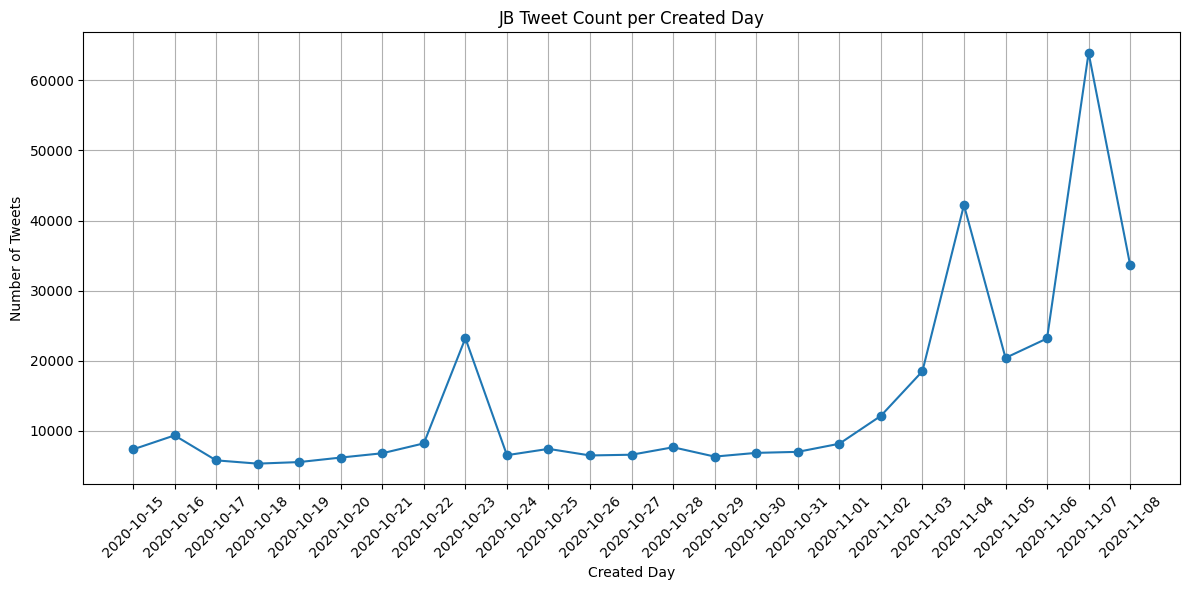

In [324]:
# Tweet Count per Created Day
plt.figure(figsize=(12, 6))

# Generate x-values as a range from 0 to the length of the data
x_values = range(len(tweets_over_created_day))

plt.plot(x_values, tweets_over_created_day.values, marker='o')
plt.title('JB Tweet Count per Created Day')
plt.xlabel('Created Day')
plt.ylabel('Number of Tweets')

# Set x-ticks to be the range of values and label them with the actual dates
plt.xticks(x_values, [date.strftime('%Y-%m-%d') for date in tweets_over_created_day.index], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


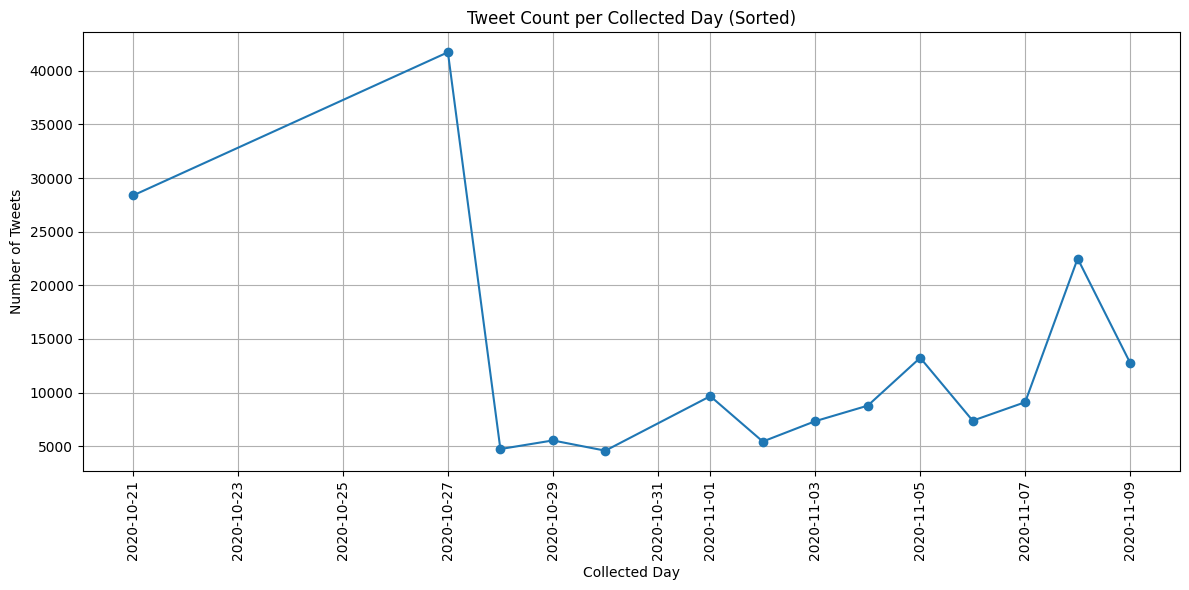

In [325]:


# Get the tweet counts per day and sort by date
tweets_per_day = jb_usa['collected_at'].value_counts().sort_index()

# Plot the sorted data
plt.figure(figsize=(12, 6))
plt.plot(tweets_per_day.index, tweets_per_day.values, marker='o')
plt.title('Tweet Count per Collected Day (Sorted)')
plt.xlabel('Collected Day')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=90)
plt.grid(True)
plt.tight_layout()
plt.show()


### Likes OverTime

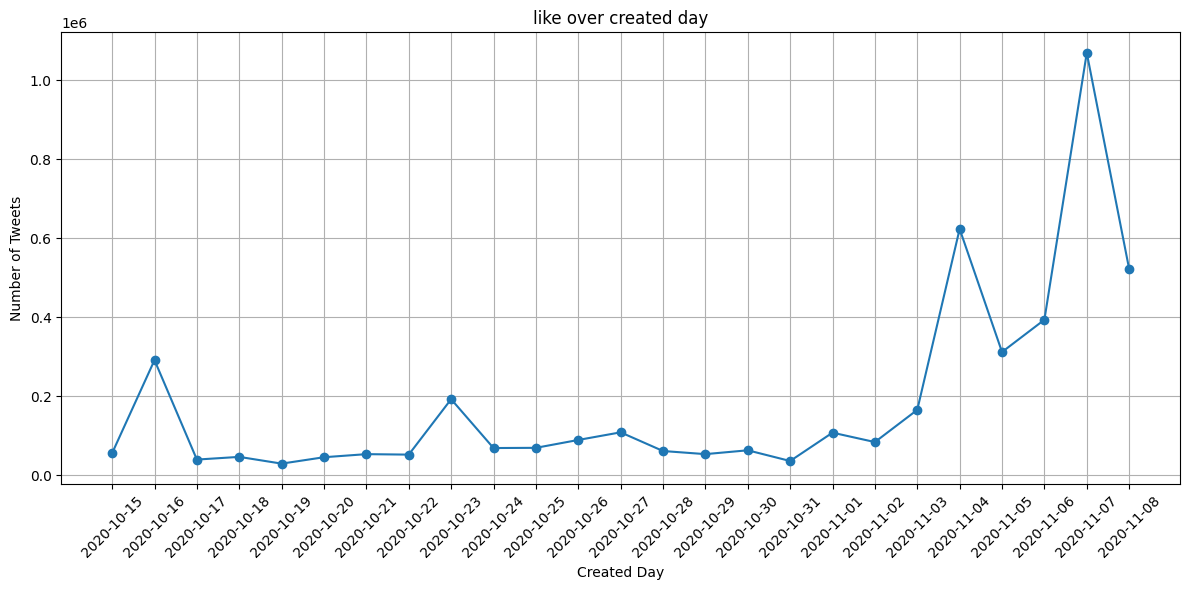

In [326]:
likes_over_created_day.index = pd.to_datetime(likes_over_created_day.index)


# Tweet Count per Created Day
plt.figure(figsize=(12, 6))

# Generate x-values as a range from 0 to the length of the data
x_values = range(len(likes_over_created_day))

plt.plot(x_values, likes_over_created_day.values, marker='o')
plt.title('like over created day')
plt.xlabel('Created Day')
plt.ylabel('Number of Tweets')

# Set x-ticks to be the range of values and label them with the actual dates
plt.xticks(x_values, [date.strftime('%Y-%m-%d') for date in likes_over_created_day.index], rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()


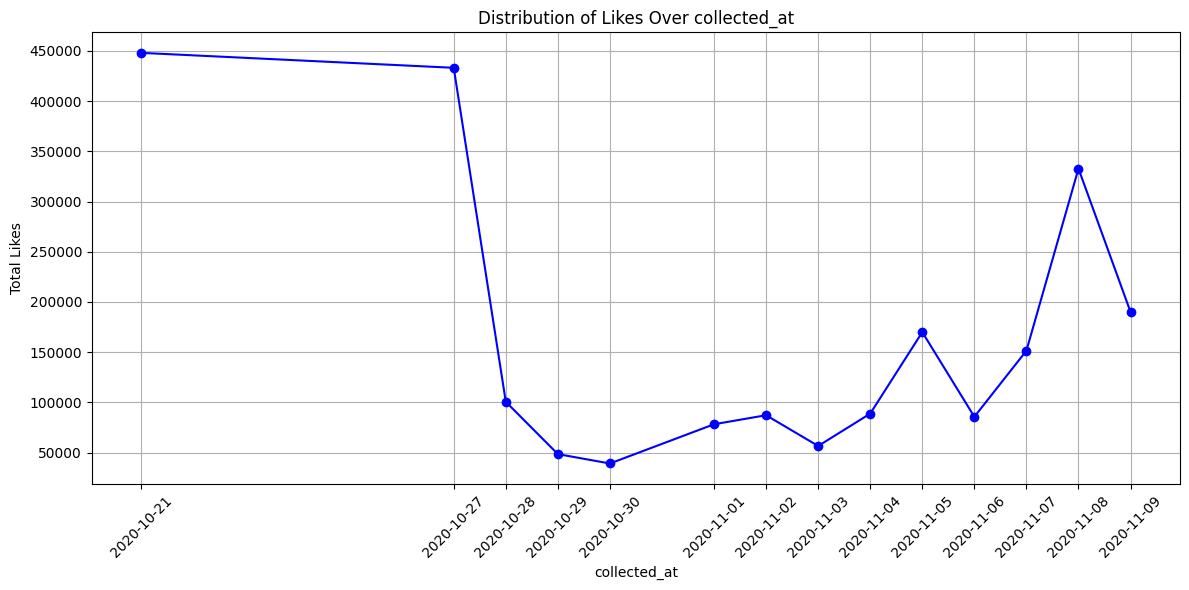

In [328]:
# Likes Over collected_at
plt.figure(figsize=(12, 6))

like_over_collect_day = jb_usa.groupby('collected_at')['likes'].sum()
# Create a line plot for likes distribution
plt.plot(jb_usa.groupby('collected_at')['likes'].sum(), color='blue', marker='o')

# Add labels and title
plt.xlabel('collected_at')
plt.ylabel('Total Likes')
plt.title('Distribution of Likes Over collected_at')

# Rotate x-axis 
plt.xticks(like_over_collect_day.index, like_over_collect_day.index.strftime('%Y-%m-%d'), rotation=45)
plt.grid(True)
# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.show()

### Retweet Over Time

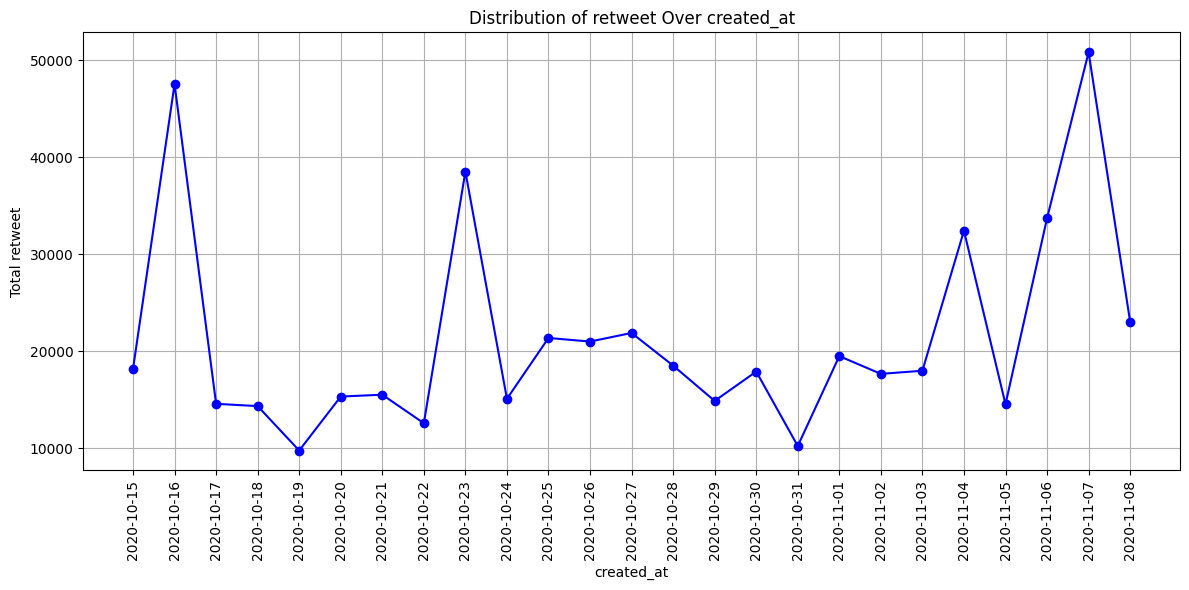

In [329]:
# Distribution of retweet Over created_at

plt.figure(figsize=(12, 6))

Reteet_over_created_day = jb_usa.groupby('created_at')['retweet_count'].sum()

plt.plot(Reteet_over_created_day, color='blue', marker='o')

# Add labels and title
plt.xlabel('created_at')
plt.ylabel('Total retweet')
plt.title('Distribution of retweet Over created_at')
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks( Reteet_over_created_day.index.strftime('%Y-%m-%d'), rotation=90)

# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.show()

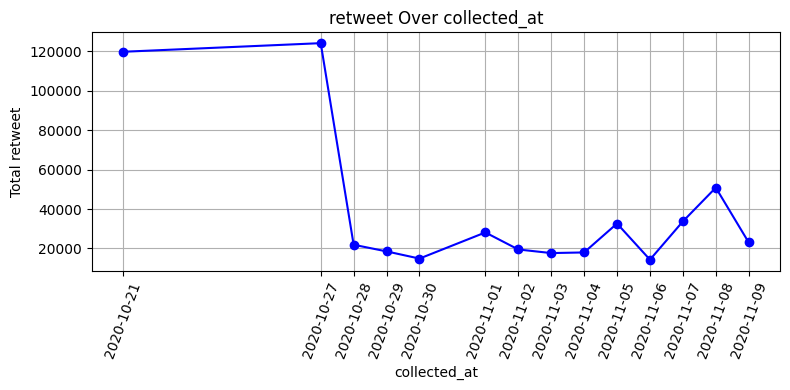

In [331]:
# retweet Over collected_at
plt.figure(figsize=(8, 4))

retweet_over_collected_day = jb_usa.groupby('collected_at')['retweet_count'].sum()
# Create a line plot for likes distribution
plt.plot(jb_usa.groupby('collected_at')['retweet_count'].sum(), color='blue', marker='o')

# Add labels and title
plt.xlabel('collected_at')
plt.ylabel('Total retweet')
plt.title('retweet Over collected_at')

# Rotate x-axis 
plt.xticks(retweet_over_collected_day.index.strftime('%Y-%m-%d'), rotation=70)
plt.grid(True)
# Adjust layout for better fit
plt.tight_layout()

# Show plot
plt.show()

=====================================================================


- ### Teewt, Retweet, Likes over state

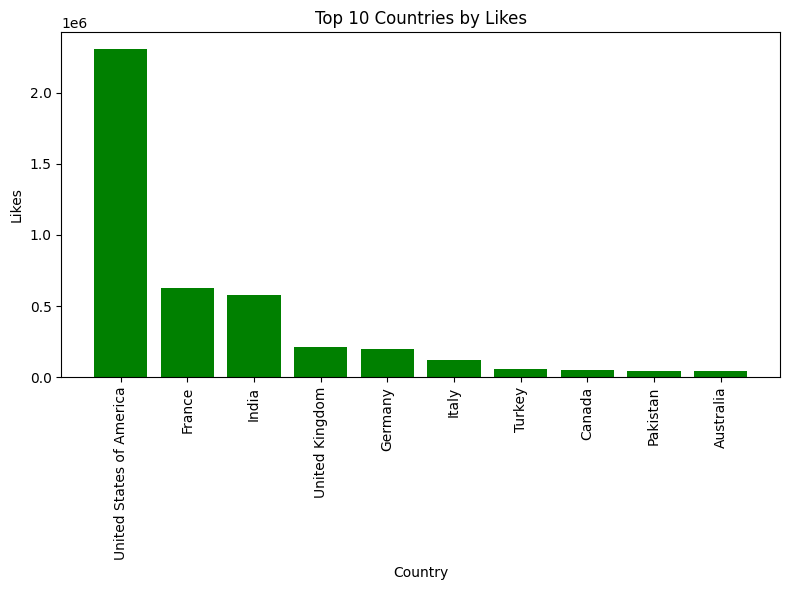

In [332]:
plt.figure(figsize=(8,6))

# Group by country, sum the likes, sort in descending order, and select the top 10
top_10_countries = jb.groupby("country")["likes"].sum().sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 countries
plt.bar(top_10_countries.index, top_10_countries, color='green')

plt.xlabel('Country')
plt.ylabel('Likes')
plt.title('Top 10 Countries by Likes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

plt.show()


In [333]:
jb_usa.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'collected_at', 'emojis',
       'cleaned_tweet', 'language', 'sentiment_vader', 'sentiment_TextBlob',
       'sentiment_Transformers'],
      dtype='object')

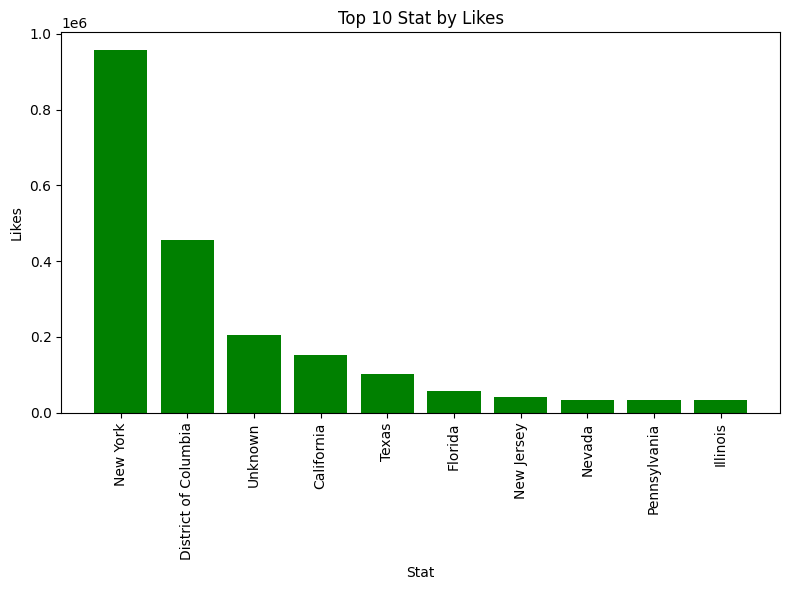

In [337]:
plt.figure(figsize=(8,6))

# Likes over top 10 state 
top_10_state = jb_usa.groupby("state")["likes"].sum().sort_values(ascending=False).head(10)


plt.bar(top_10_state.index, top_10_state, color='green')

plt.xlabel('Stat')
plt.ylabel('Likes')
plt.title('Top 10 Stat by Likes')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

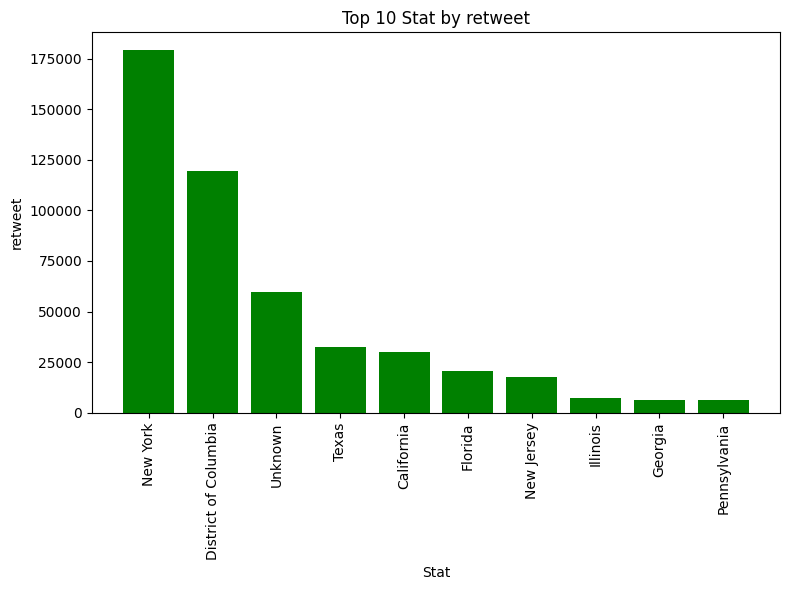

In [336]:
plt.figure(figsize=(8,6))

# Likes over top 10 state 
top_10_state = jb_usa.groupby("state")["retweet_count"].sum().sort_values(ascending=False).head(10)


plt.bar(top_10_state.index, top_10_state, color='green')

plt.xlabel('Stat')
plt.ylabel('retweet')
plt.title('Top 10 Stat by retweet')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

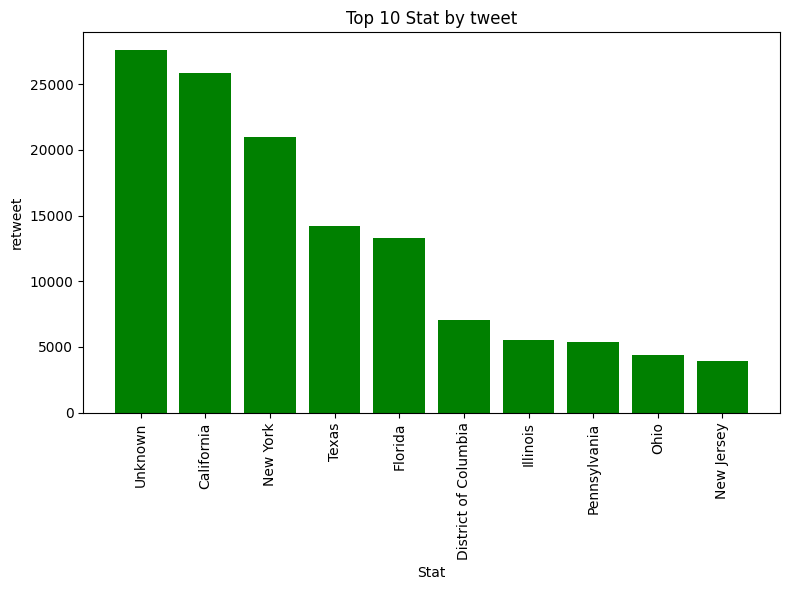

In [338]:
plt.figure(figsize=(8,6))

# Likes over top 10 state 
top_10_state = jb_usa.groupby("state")["tweet"].count().sort_values(ascending=False).head(10)


plt.bar(top_10_state.index, top_10_state, color='green')

plt.xlabel('Stat')
plt.ylabel('retweet')
plt.title('Top 10 Stat by tweet')

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Adjust layout for better fit
plt.tight_layout()

plt.show()

=====================================================================================

- ## Sentiment overtime 

In [13]:
import matplotlib.pyplot as plt


In [127]:
import pandas as pd

jb = pd.read_csv('C:\Tweeter project\Election dataset\jb_1_en_sent3.csv')

In [344]:
jb_usa.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'collected_at', 'emojis',
       'cleaned_tweet', 'language', 'sentiment_vader', 'sentiment_TextBlob',
       'sentiment_Transformers', 'sentiment_category_TextBlob'],
      dtype='object')

In [343]:
# 'sentiment_TextBlob' categorized
jb_usa['sentiment_category_TextBlob'] = jb_usa['sentiment_TextBlob'].apply(lambda x: 'positive' if x > 0 
                                                          else ('negative' if x < 0 
                                                          else 'neutral'))

C:\Users\louay\AppData\Local\Temp\ipykernel_13712\2422056071.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  jb_usa['sentiment_category_TextBlob'] = jb_usa['sentiment_TextBlob'].apply(lambda x: 'positive' if x > 0


In [359]:
sentiment_TextBlob_counts = jb_usa.groupby(['created_at', 'sentiment_category_TextBlob']).size().unstack(fill_value=0)


In [360]:
jb_usa['created_at']

0        2020-10-15
1        2020-10-15
2        2020-10-15
3        2020-10-15
4        2020-10-15
            ...    
355265   2020-11-08
355266   2020-11-08
355269   2020-11-08
355273   2020-11-08
355275   2020-11-08
Name: created_at, Length: 181136, dtype: datetime64[ns]

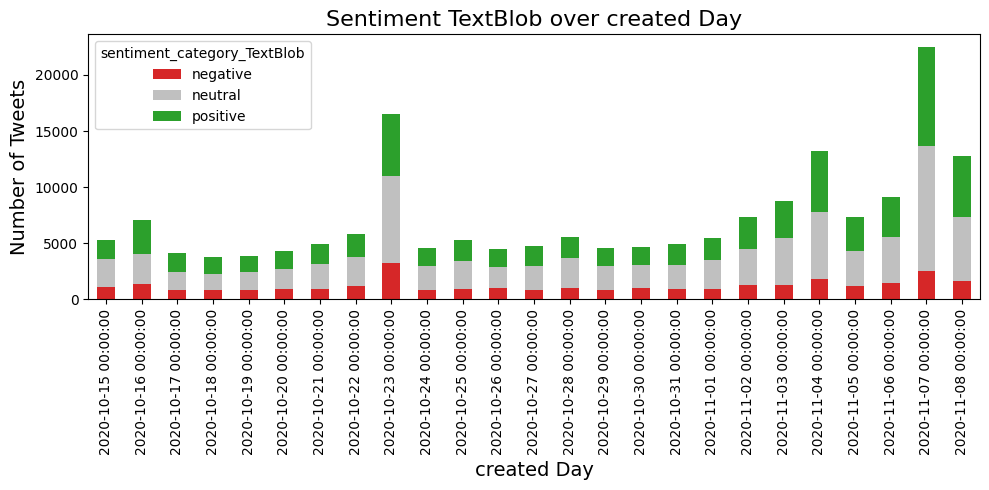

In [361]:
sentiment_TextBlob_counts.plot(kind='bar', stacked=True, figsize=(10, 5), color=['tab:red','silver','tab:green'])

# Adding titles and labels
plt.title('Sentiment TextBlob over created Day', fontsize=16)
plt.xlabel('created Day', fontsize=14)
plt.ylabel('Number of Tweets', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [363]:
# 'sentiment_TextBlob' vader
jb_usa.loc[:, 'sentiment_category_vader'] = jb_usa['sentiment_vader'].apply(
    lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral')
)

In [367]:
sentiment_vader_counts_us = jb_usa.groupby(['created_at', 'sentiment_category_vader']).size().unstack(fill_value=0)


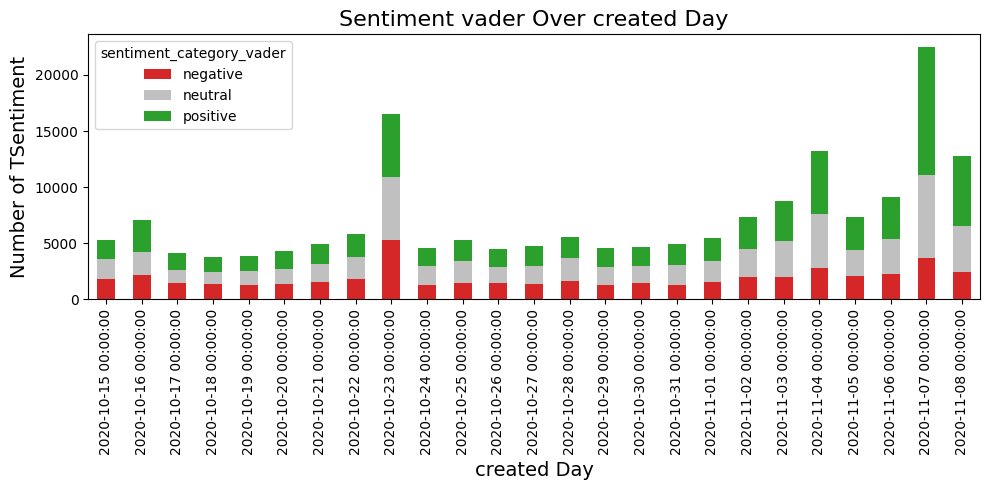

In [368]:
sentiment_vader_counts_us.plot(kind='bar', stacked=True, figsize=(10, 5), color=['tab:red','silver','tab:green'])

# Adding titles and labels
plt.title('Sentiment vader Over created Day', fontsize=16)
plt.xlabel('created Day', fontsize=14)
plt.ylabel('Number of TSentiment', fontsize=14)

# Rotate x-axis labels for better readability
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()

In [369]:

tatal_vader_sent = jb_usa['sentiment_category_vader'].value_counts()

In [370]:
total_textblok_Sent = jb_usa['sentiment_category_TextBlob'].value_counts()

In [372]:
jb_usa.columns

Index(['created_at', 'tweet', 'likes', 'retweet_count', 'user_screen_name',
       'user_join_date', 'user_followers_count', 'user_location', 'lat',
       'long', 'city', 'country', 'state', 'collected_at', 'emojis',
       'cleaned_tweet', 'language', 'sentiment_vader', 'sentiment_TextBlob',
       'sentiment_Transformers', 'sentiment_category_TextBlob',
       'sentiment_category_vader'],
      dtype='object')

In [374]:
jb_usa['sentiment_category_TextBlob'].value_counts()


sentiment_category_TextBlob
neutral     81590
positive    68501
negative    31045
Name: count, dtype: int64

In [375]:
jb_usa['sentiment_category_vader'].value_counts()

sentiment_category_vader
positive    72054
neutral     60902
negative    48180
Name: count, dtype: int64

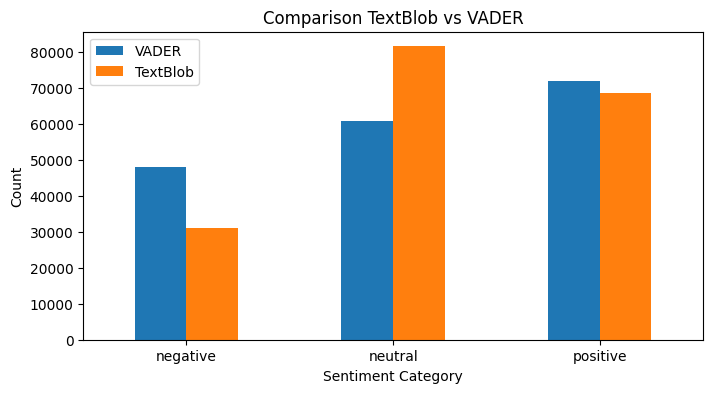

In [376]:
vader_counts = jb_usa['sentiment_category_vader'].value_counts()
textblob_counts = jb_usa['sentiment_category_TextBlob'].value_counts()

# Combine the counts into a DataFrame
sentiment_comparison = pd.DataFrame({
    'VADER': vader_counts,
    'TextBlob': textblob_counts})

# Plotting the comparison
sentiment_comparison.plot(kind='bar', figsize=(8, 4))
plt.title('Comparison TextBlob vs VADER')
plt.ylabel('Count')
plt.xlabel('Sentiment Category')
plt.xticks(rotation=0)
plt.show()

In [ ]:
# selected_date = '2020-10-29'
# filtered_tweets = jb_1_lang[jb_1_lang['created_at'] == selected_date]

# # Sort by engagement metrics: Likes and Retweets
# top_tweets = filtered_tweets.sort_values(by=['likes', 'retweet_count'], ascending=False).head(10)

# # Display the top 10 tweets
# top_tweets[['tweet', 'likes', 'retweet_count', 'sentiment_TextBlob']]

=================================================================================

In [476]:
# import os

# # Create the directory if it doesn't exist
# directory = "C:\\Users\\louay\\OneDrive\\Desktop\\Twitter Election Data Analysis\\Election dataset"
# os.makedirs(directory, exist_ok=True)

# # Save the cleaned DataFrame to a new file
# jb_1_lang.to_csv(f"{directory}\\jb_1_en_sent3.csv", index=False)